# Project: Investigate a Dataset - Database_TMDb_movie_data

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 


This data set contains information about 10,000 movies collected from The Movie Database (TMDb), including user ratings and revenue.
Certain columns, like ‘cast’ and ‘genres’, contain multiple values separated by pipe (|) characters.
* There are some odd characters in the ‘cast’ column. Don’t worry about cleaning them. You can leave them as is.
* The final two columns ending with “_adj” show the budget and revenue of the associated movie in terms of 2010 dollars, accounting for inflation over time.


### Question(s) for Analysis
* Which genres are most popular from year to year?
* What kinds of properties are associated with movies that have high revenues?

In [40]:
# While optional for current notebooks, if you are having trouble with visualizations,
#   remember to include a 'magic word' so that your visualizations are plotted
#   inline with the notebook. See this page for more:
#   http://ipython.readthedocs.io/en/stable/interactive/magics.html
import pandas as pd
import matplotlib.pyplot as plt

<a id='wrangling'></a>
## Data Wrangling

In [41]:
# Load your data and print out a few lines. What is the size of your dataframe? 
df = pd.read_csv('Database_TMDb_movie_data/tmdb-movies.csv')
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [42]:
# check the types of columns and missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

In [43]:
df.shape

(10866, 21)

### Are there missing values, duplicates, or inconsistencies?

In [44]:
# check for missing or null value
df.isnull().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

In [45]:
# Check for duplicates
df.duplicated().sum()

1


### Data Cleaning
Common Issues to Address:
* Handle missing or null values.
* Remove duplicates.
* Standardize column names and formats (e.g., dates, numerical values).

In [46]:
# Drop duplicates
df = df.drop_duplicates()
df.shape

(10865, 21)

In [47]:
# removing column 'homepage', 'tagline' as it has no relavant
df_cleaned = df.drop(columns=['homepage', 'tagline'])
df_cleaned.shape

(10865, 19)

In [48]:
# function to fill NaN values with empty strings
def fill_nan_values(dataframe, columns):
    for column in columns:
        dataframe[column] = dataframe[column].fillna('')
    return dataframe


columns_with_null_value = ['genres', 'keywords', 'production_companies', 'cast', 'director', 'imdb_id', 'overview']

# Call the function
df_cleaned = fill_nan_values(df_cleaned, columns_with_null_value)

# Verify the changes
print(df_cleaned[columns_with_null_value].isnull().sum())

genres                  0
keywords                0
production_companies    0
cast                    0
director                0
imdb_id                 0
overview                0
dtype: int64


In [49]:
df_cleaned.shape

(10865, 19)

In [50]:
df_cleaned.isnull().sum()

id                      0
imdb_id                 0
popularity              0
budget                  0
revenue                 0
original_title          0
cast                    0
director                0
keywords                0
overview                0
runtime                 0
genres                  0
production_companies    0
release_date            0
vote_count              0
vote_average            0
release_year            0
budget_adj              0
revenue_adj             0
dtype: int64

In [51]:
# function to convert '|' separater with lists
def clean_pipe_separated_column(dataframe, columns):
    for column in columns:
        dataframe[column] = dataframe[column].apply(lambda x: x.split("|") if x else [])
    return dataframe

columns_to_split = ['genres', 'keywords', 'cast', 'production_companies']
df_cleaned = clean_pipe_separated_column(df_cleaned, columns_to_split)
df_cleaned[columns_to_split].head()

,genres,keywords,cast,production_companies
0,"[Action, Adventure, Science Fiction, Thriller]","[monster, dna, tyrannosaurus rex, velociraptor...","[Chris Pratt, Bryce Dallas Howard, Irrfan Khan...","[Universal Studios, Amblin Entertainment, Lege..."
1,"[Action, Adventure, Science Fiction, Thriller]","[future, chase, post-apocalyptic, dystopia, au...","[Tom Hardy, Charlize Theron, Hugh Keays-Byrne,...","[Village Roadshow Pictures, Kennedy Miller Pro..."
2,"[Adventure, Science Fiction, Thriller]","[based on novel, revolution, dystopia, sequel,...","[Shailene Woodley, Theo James, Kate Winslet, A...","[Summit Entertainment, Mandeville Films, Red W..."
3,"[Action, Adventure, Science Fiction, Fantasy]","[android, spaceship, jedi, space opera, 3d]","[Harrison Ford, Mark Hamill, Carrie Fisher, Ad...","[Lucasfilm, Truenorth Productions, Bad Robot]"
4,"[Action, Crime, Thriller]","[car race, speed, revenge, suspense, car]","[Vin Diesel, Paul Walker, Jason Statham, Miche...","[Universal Pictures, Original Film, Media Righ..."


In [52]:
# Convert 'release_date' to datetime format
df_cleaned['release_date'] = pd.to_datetime(df_cleaned['release_date'], errors='coerce')

In [53]:
df_cleaned.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,director,keywords,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,"[Chris Pratt, Bryce Dallas Howard, Irrfan Khan...",Colin Trevorrow,"[monster, dna, tyrannosaurus rex, velociraptor...",Twenty-two years after the events of Jurassic ...,124,"[Action, Adventure, Science Fiction, Thriller]","[Universal Studios, Amblin Entertainment, Lege...",2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,"[Tom Hardy, Charlize Theron, Hugh Keays-Byrne,...",George Miller,"[future, chase, post-apocalyptic, dystopia, au...",An apocalyptic story set in the furthest reach...,120,"[Action, Adventure, Science Fiction, Thriller]","[Village Roadshow Pictures, Kennedy Miller Pro...",2015-05-13,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,"[Shailene Woodley, Theo James, Kate Winslet, A...",Robert Schwentke,"[based on novel, revolution, dystopia, sequel,...",Beatrice Prior must confront her inner demons ...,119,"[Adventure, Science Fiction, Thriller]","[Summit Entertainment, Mandeville Films, Red W...",2015-03-18,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,"[Harrison Ford, Mark Hamill, Carrie Fisher, Ad...",J.J. Abrams,"[android, spaceship, jedi, space opera, 3d]",Thirty years after defeating the Galactic Empi...,136,"[Action, Adventure, Science Fiction, Fantasy]","[Lucasfilm, Truenorth Productions, Bad Robot]",2015-12-15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,"[Vin Diesel, Paul Walker, Jason Statham, Miche...",James Wan,"[car race, speed, revenge, suspense, car]",Deckard Shaw seeks revenge against Dominic Tor...,137,"[Action, Crime, Thriller]","[Universal Pictures, Original Film, Media Righ...",2015-04-01,2947,7.3,2015,1.747999e+08,1.385749e+09


<a id='eda'></a>
## Exploratory Data Analysis

### Common Findings

### Most popular movies

In [54]:
show_data = ['original_title', 'cast', 'director', 'genres']

In [55]:
# Find the top 5 most popular movies
top_popular_movies = df_cleaned.sort_values('popularity', ascending=False).head()
top_popular_movies.loc[:, ['original_title', 'cast', 'director', 'genres']]

,original_title,cast,director,genres
0,Jurassic World,"[Chris Pratt, Bryce Dallas Howard, Irrfan Khan...",Colin Trevorrow,"[Action, Adventure, Science Fiction, Thriller]"
1,Mad Max: Fury Road,"[Tom Hardy, Charlize Theron, Hugh Keays-Byrne,...",George Miller,"[Action, Adventure, Science Fiction, Thriller]"
629,Interstellar,"[Matthew McConaughey, Jessica Chastain, Anne H...",Christopher Nolan,"[Adventure, Drama, Science Fiction]"
630,Guardians of the Galaxy,"[Chris Pratt, Zoe Saldana, Dave Bautista, Vin ...",James Gunn,"[Action, Science Fiction, Adventure]"
2,Insurgent,"[Shailene Woodley, Theo James, Kate Winslet, A...",Robert Schwentke,"[Adventure, Science Fiction, Thriller]"


### Highest-Grossing Movies

In [56]:
# Find the top 5 highest-grossing movies
highest_grossing_movies = df_cleaned.sort_values('revenue', ascending=False).head()
highest_grossing_movies.loc[:, ['original_title', 'cast', 'director', 'genres']]

,original_title,cast,director,genres
1386,Avatar,"[Sam Worthington, Zoe Saldana, Sigourney Weave...",James Cameron,"[Action, Adventure, Fantasy, Science Fiction]"
3,Star Wars: The Force Awakens,"[Harrison Ford, Mark Hamill, Carrie Fisher, Ad...",J.J. Abrams,"[Action, Adventure, Science Fiction, Fantasy]"
5231,Titanic,"[Kate Winslet, Leonardo DiCaprio, Frances Fish...",James Cameron,"[Drama, Romance, Thriller]"
4361,The Avengers,"[Robert Downey Jr., Chris Evans, Mark Ruffalo,...",Joss Whedon,"[Science Fiction, Action, Adventure]"
0,Jurassic World,"[Chris Pratt, Bryce Dallas Howard, Irrfan Khan...",Colin Trevorrow,"[Action, Adventure, Science Fiction, Thriller]"


### Most Common Genres

In [57]:
# Display the most common genres
genre_series = df_cleaned['genres'].explode()
most_popular_genres = genre_series.value_counts()
most_popular_genres

Drama              4760
Comedy             3793
Thriller           2907
Action             2384
Romance            1712
Horror             1637
Adventure          1471
Crime              1354
Family             1231
Science Fiction    1229
Fantasy             916
Mystery             810
Animation           699
Documentary         520
Music               408
History             334
War                 270
Foreign             188
TV Movie            167
Western             165
Name: genres, dtype: int64

### What are the most popular genres, and how do they correlate with revenue and ratings?

### Most Common Genres

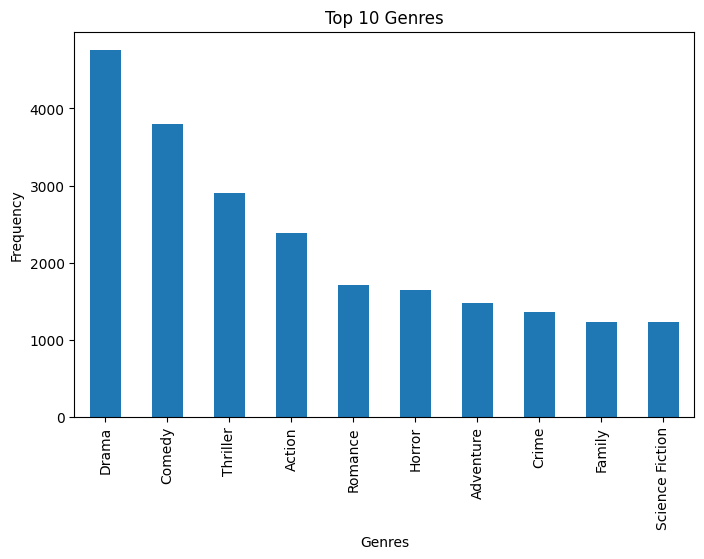

In [58]:
# Plot top genres
most_popular_genres.head(10).plot(kind='bar', title='Top 10 Genres', figsize=(8, 5));
plt.xlabel('Genres')
plt.ylabel('Frequency')
plt.show()


### Findings: Most Freequency Genres
- `Drama` and `Comedy` are the most frequently occurring genres, indicating their mass appeal.


In [59]:
print(df_cleaned['vote_average'].describe())

count    10865.000000
mean         5.975012
std          0.935138
min          1.500000
25%          5.400000
50%          6.000000
75%          6.600000
max          9.200000
Name: vote_average, dtype: float64


### Budget vs. Revenue

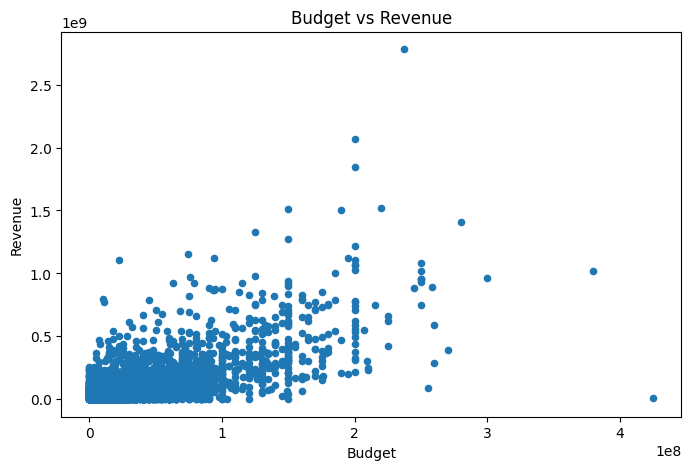

In [60]:
# Scatter plot of budget vs revenue
df_cleaned.plot.scatter(x='budget', y='revenue', title='Budget vs Revenue', figsize=(8, 5));
plt.xlabel('Budget')
plt.ylabel('Revenue')
plt.show()

### Findings: Budget vs Revenue
- There is a positive correlation between budget and revenue. Higher-budget movies tend to generate more revenue.
- However, some low-budget movies achieve high revenues, indicating exceptions.


### Average Popularity by Genre

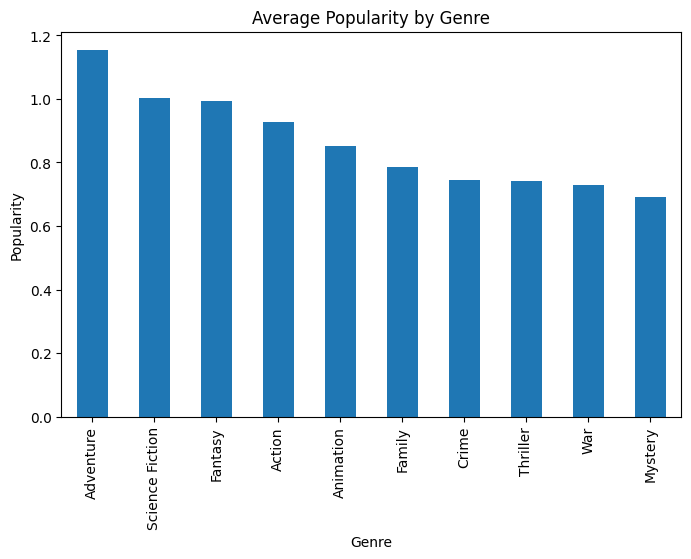

In [61]:
# Merge exploded genres with popularity for group analysis
genre_popularity = df_cleaned.explode('genres').groupby('genres')['popularity'].mean()

# Plot average popularity by genre
genre_popularity.sort_values(ascending=False).head(10).plot(kind='bar', title='Average Popularity by Genre', figsize=(8, 5));
plt.xlabel('Genre')
plt.ylabel('Popularity')
plt.show()

### Findings: Average Popular Genres
- `Science Fiction` and `Adventure` are the average occurring genres, indicating their mass appeal.

###  Correlation Heatmap

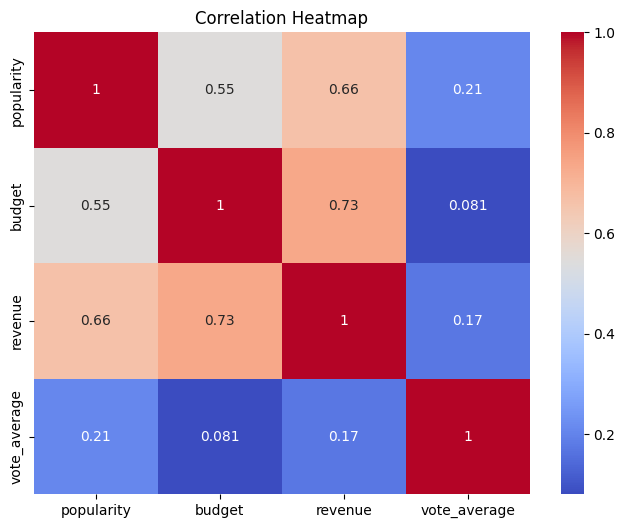

In [62]:
import seaborn as sns

# Select numerical columns for correlation
correlation_data = df_cleaned[['popularity', 'budget', 'revenue', 'vote_average']].corr()

# Create a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_data, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

### Relationship with Budget, Revenue, and Popularity

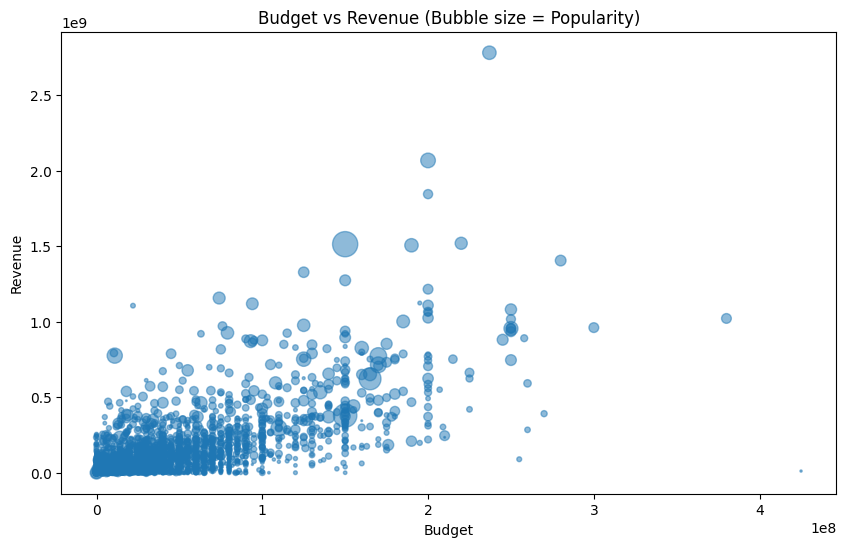

In [63]:
# Bubble plot for budget, revenue, and popularity
plt.figure(figsize=(10, 6))
plt.scatter(df_cleaned['budget'], df_cleaned['revenue'], s=df_cleaned['popularity']*10, alpha=0.5)
plt.title('Budget vs Revenue (Bubble size = Popularity)')
plt.xlabel('Budget')
plt.ylabel('Revenue')
plt.show()

### Findings: Relationship Between Budget, Revenue, and Popularity
-   There is a clear positive correlation between budget and revenue, indicating that higher-budget movies generally generate more revenue.
-   Larger bubbles (representing higher popularity) tend to cluster around higher budgets and revenues, showing that popular movies are often well-funded and profitable.

<a id='conclusions'></a>
## Conclusions
### **Conclusions**

**Results:** Our data suggest that:

1.  There is a consistent increase in revenue with higher movie budgets, but low-budget movies can still generate substantial profits (e.g., *Paranormal Activity*).
2.  Action and Adventure genres dominate in popularity and revenue, indicating their mass appeal.
3.  Popularity scores do not always align with higher revenue, suggesting that factors beyond audience interest impact financial success.

* * * * *

### **Limitations**

**Limitations:** There are a couple of limitations with our data:

1.  The dataset contains many missing values (e.g., `homepage` and `tagline`), which limits the depth of analysis for certain features.
2.  Some critical financial data, such as `budget` and `revenue`, have numerous entries marked as `0`, likely due to missing data, which could skew financial analyses.
3.  The `genres` column represents multiple genres per movie but does not indicate the primary genre, which could lead to misinterpretation of genre-specific trends.

In [64]:
# Running this cell will execute a bash command to convert this notebook to an .html file
!python -m nbconvert --to html Investigate_a_Dataset.ipynb

[NbConvertApp] Converting notebook Investigate_a_Dataset.ipynb to html
[NbConvertApp] WARNING | Alternative text is missing on 4 image(s).
[NbConvertApp] Writing 480207 bytes to Investigate_a_Dataset.html
